In [1]:
import numpy as np

In [62]:
n_neurons = 10
n_ts = 100
n_reps  = 5
lr_h = 0.001
lr_J = 0.001

J = np.random.normal(0,1,size=(n_neurons,n_neurons))
h = np.random.normal(0,1,size=(n_ts,n_neurons))

X = np.random.choice([1,-1],size=(n_reps,n_ts,n_neurons))



In [130]:
S = np.mean(X,axis=0)[1:]
D = np.mean(np.einsum('ijk,ijm->ijkm',X[:,:-1],X[:,:-1]),axis=(0,1))
theta = np.stack([h for _ in range(len(X))]) + np.einsum('ij,rtj->rtj',J,X)

dh = lr_h*(S - np.mean(np.tanh(theta[:,:-1]),axis=0))
dJ = lr_J*(D- np.mean(np.einsum('rti,rtj->rtij',np.tanh(theta[:,:-1]),X[:,:-1]),axis=(0,1)))

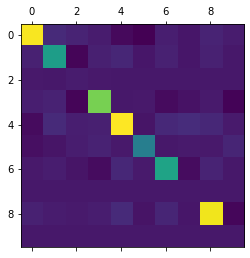

In [134]:
import matplotlib.pyplot as plt
plt.matshow(dJ)

In [129]:
prova = np.mean(np.einsum('rti,rtj->rtij',np.tanh(theta[:,:-1]),X[:,:-1]),axis=(0,1))
prova.shape

(10, 10)

In [119]:
a = np.tanh(theta[:,:-1])
print(a.shape)
b = X[:,:-1]
print(b.shape)

(5, 99, 10)
(5, 99, 10)


In [114]:
D.shape

(10, 10)

In [96]:
A1 =(J@X[0].T).T

In [95]:
A = np.einsum('ij,rtj->rti',J,X)
A.shape
A2 = A[0]

In [73]:
np.mean(np.einsum('ijk,ijm->ijkm',np.tanh(theta[:,:-1]),X[:,:-1]),axis=(0,1))

ValueError: einstein sum subscripts string contains too many subscripts for operand 0